In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle
import os


In [54]:
file_path = r"C:\Users\ishik\Downloads\gld_price_data.csv"

In [55]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(file_path)

In [56]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [57]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [58]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [59]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [60]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [61]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [62]:
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Calculate the correlation matrix excluding the 'Date' column
correlation = gold_data.drop(columns=['Date']).corr()

<Axes: >

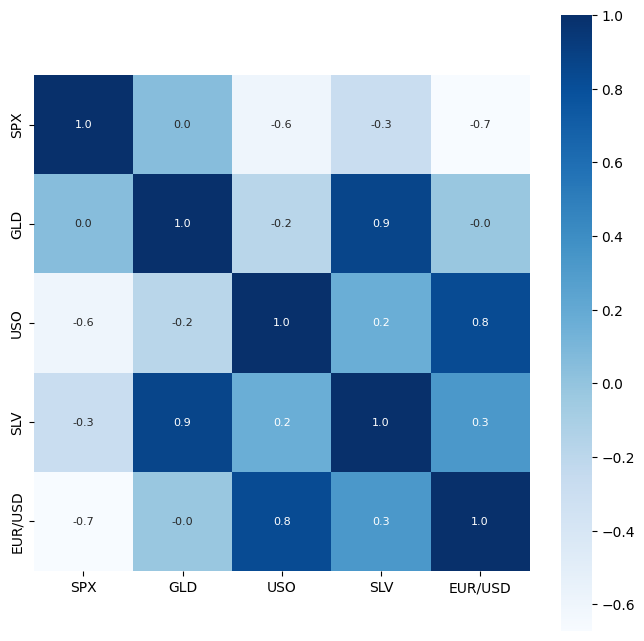

In [63]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [64]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ishik\AppData\Local\Temp\ipykernel_33092\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

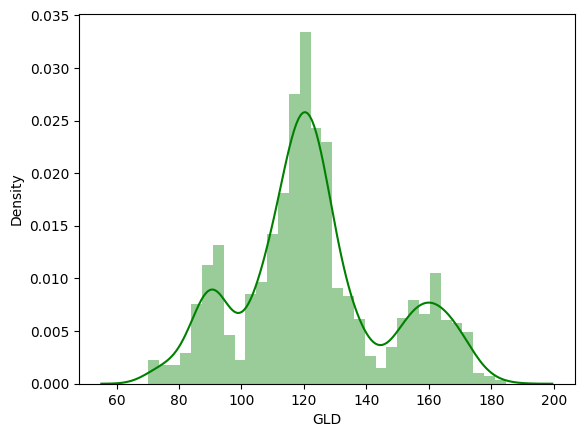

In [65]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [66]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [67]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [68]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
# train_test_split returns 4 values: X_train, X_test, Y_train, Y_test
# We need to assign these 4 values to 4 variables to avoid the error.
# 'st' was likely intended to be 'X_train', so it's replaced here.

In [70]:
regressor = RandomForestRegressor(n_estimators=100)

In [71]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [72]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [73]:
print(test_data_prediction)

[168.44649947  82.06669983 116.04750035 127.59660045 120.72170147
 154.7526974  149.90539898 126.17160058 117.39399896 126.07480096
 116.49620101 172.61600064 141.42789849 167.96959726 115.33360057
 117.40360052 138.79980346 170.29880121 159.50590324 158.62459936
 155.23480021 125.0150005  175.19939936 157.13010302 125.23320051
  93.66339975  77.75199959 120.68629989 119.0721994  167.50059996
  88.29480014 125.33510033  91.32280089 117.79480034 121.07329901
 136.52010059 115.83220116 114.94210092 145.26870033 107.20330113
 104.34820268  87.32889823 126.48970062 117.82819958 153.70939913
 119.58110031 108.38719975 108.05669814  93.2337004  127.04529796
  75.49880017 113.67899873 121.3614001  111.25859897 118.84269901
 120.7921993  159.13299937 169.56060167 146.78609646  85.73549865
  94.02930056  86.83749871  90.37920027 118.97900069 126.44120078
 127.55410029 170.20170023 122.3166997  117.20919909  99.01639989
 168.12320059 142.94519873 132.1873026  121.04990235 121.42829919
 119.73690

In [74]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893892276214675


In [78]:
import numpy as np

# Define your tolerance level, e.g., 10% of the actual value
tolerance = 0.10

# Calculate relative error
relative_errors = np.abs((Y_test - test_data_prediction) / Y_test)

# Count how many predictions are within the tolerance
accuracy = np.mean(relative_errors < tolerance)

print("Custom Accuracy (within ±10% tolerance):", accuracy * 100, "%")


Custom Accuracy (within ±10% tolerance): 99.78165938864629 %


In [75]:
Y_test = list(Y_test)

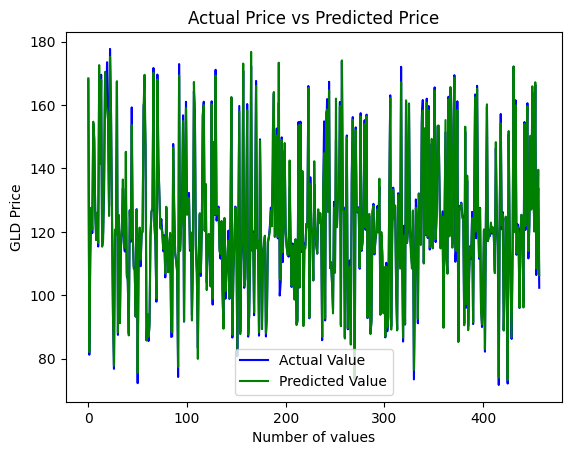

In [76]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [77]:
file_path = r"C:\Users\ishik\Desktop\goldprice\rf_model.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(regressor, file)

print(f"Model saved at: {file_path}")


Model saved at: C:\Users\ishik\Desktop\goldprice\rf_model.pkl
